<a href="https://colab.research.google.com/github/Sjoerd-de-Witte/Test1/blob/main/1_1_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!gdown -O /tmp/ml.py 174lBNvDBJSVWs3OpNL3a68cnhWIcWYuY
%run /tmp/ml.py

Downloading...
From: https://drive.google.com/uc?id=174lBNvDBJSVWs3OpNL3a68cnhWIcWYuY
To: /tmp/ml.py
100% 1.31k/1.31k [00:00<00:00, 6.09MB/s]


# Linear Regression in Python

# Inductive Learning

In machine learning we aim to learn general concepts from specific examples, which is called **inductive learning**. There are two different settings from machine learning: supervised and unsupervised learning. For now we focus on **supervised learning**, meaning that the learning algorithm has access to the known correct value of the target variable for every example.

Generalization refers to how well the concepts learned by a machine learning model apply to specific examples not seen by the model when it was learning. The goal of a good machine learning model is to generalize well from the training data to new data from the same problem domain. This allows us to make predictions in the future on data the model has never seen.

# SKLearn and PipeTorch

To optimally implement a Machine Learning algorithm can be quite tricky, therefore we typically do not implement algorithms ourselves unless we have to. The SKLearn (Scikit Learn) library contains many popular machine learning algorithms and other tools that we can use. We will therefore heavily focus on learning to work with these tools, also because it is one of the most used libraries.

Unfortunately, the library support for preparing and visualizing data is not high-level, meaning that it requires a lot of code to get what we need. And all that code can be quite confusing, especially in the beginning. Therefore, we will initially start our practice using the PipeTorch library that we have written specifically for this course. Over the weeks we will gradually replace all the code from PipeTorch and learn how to write everything yourselves using Pandas, Numpy and Matplotlib. But for now, PipeTorch will help us to easily load, prepare and inspect the data so that we can focus on other things first: what these models are and what the results look like.

# Import

Always import the libraries at the beginning of these notebooks.

In [2]:
from pipetorch import DFrame
from sklearn.linear_model import LinearRegression

# Steps for Machine Learning

The standard workflow for learning a predictive model is:
- **Data**: load and prepare the data
- **Model**: choose and configure a model
- **Train**: learn the model from the dataset and validate that the model was learned correctly/optimally
- **Evaluate**: how effective is the model

And we will go over each step in every notebook.

# Data

For now we will load the data with a simple function from PipeTorch. The data is loaded a Pandas Dataframe, which we will explain in later weeks. Pipetorch automatically creates subsets called train_X, train_y, valid_X and valid_y that we need to learn a model. We will explain more on the data that we use as we go.

For your first machine learning model, you will use the Boston Housing dataset. In this dataset every **observation** is a town/neighborhood in the Boston area. Complete (if comments ask you to) and run the cells below to load the dataset for you as a Pandas Dataframe, and see what the data looks like.

In [3]:
df = DFrame.read_from_kaggle('fedesoriano/the-boston-houseprice-data')

In [4]:
# Inspect the dataset using Pandas
# You should have 14 columns and about 500 rows.
# Every row is a town or neighborhood and records the median price of owner-occupied homes x $1000 in that region,
# together with statistics such as crime rate, average age, average number of rooms per house.
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


Initially these datasets can be overwhelming. We will just use a small part to keep things simple. Whenever you want to know more about the meaning and origin of the dataset, you should look it up; the url in Google will direct you to the Kaggle webpage with the description of the dataset.

When the url for the boston housing set is not readable, you can retrieve that by first selecting the column and then the index.

For this first experiment, we will only look at the average number of rooms (which may be indicative for the size of the house) and the median sales price. The **target variable** $y$ is PRICE and the **input feature** $X$ (explanatory variable) is RM.

By default, PipeTorch will use the last column as the target variable and the other columns as features. If you switch the columns, you will attempt to predict the number of rooms based on the price.

In [5]:
df = df[['RM', 'MEDV']]

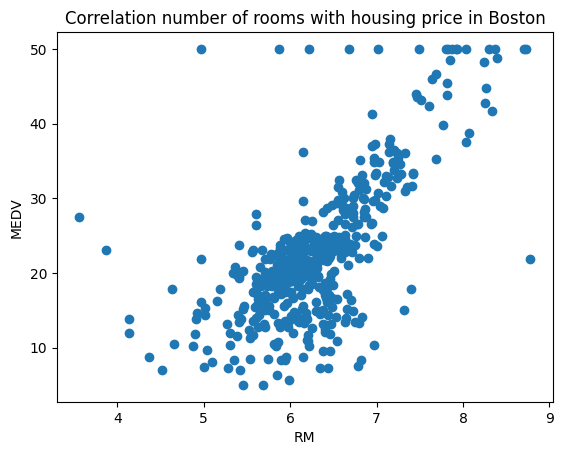

In [6]:
# Make a scatter plot of the training set
# to observe that when houses have more rooms, they tend to be more expensive.
df.train.scatter(ylabel='MEDV', xlabel='RM', title='Correlation number of rooms with housing price in Boston')

# Model

We will now learn a predictive model from this dataset (or train a model on this dataset). We choose a **linear regression** model, in other words, we hypothesize that a straight line will allow us to effectively predict the median sales price in a neighborhood, given the average number of rooms in that neighborhood.

In [9]:
# Instantiate a LinearRegression model
model = LinearRegression()

# Train

To learn a model from the dataset, you have to use the `fit` function. You need to pass a training set that consists of X's and y's:
- X: the observation that is used for the prediction
- y: the observed value for the target variable. We know these values for the training set, but not for future data.

PipeTorch automatically creates train_X and train_y for you. In later weeks you will learn how to construct these yourself.

In [11]:
# train the model
model.fit(df.train_X, df.train_y)

LinearRegression()

# Evaluate

In the evaluation, we want to check how **effective** the model is. In other words, how good is the model in making predictions. In the coming weeks, you will learn how to proper evaluate preditive models, but in this week we will simply visualize the models to inspect whether the model seems plausible to us.

Later in the course, you will write code to plot these graphs with the standad Matplotlib library. In the first weeks we will use the more simple PipeTorch function to `scatter` the dataset and draw a `line` for the model to visualize what the model looks like.

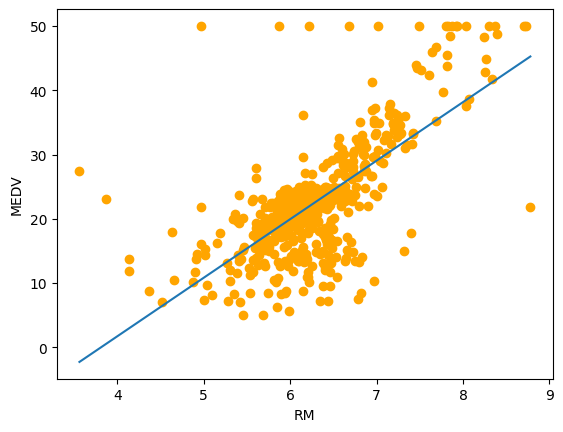

In [13]:
# Show a scatterplot with the model on top
df.train.scatter(c='orange')
df.train.line(y=model.predict)

# Model parameters

We can also inspect the learned coefficients. In this case, it has learned a function that is approximately

`price = 9.1 * rm -34.7`.

In [14]:
# show the coefficient
model.coef_

array([9.10210898])

In [15]:
# show the intercept
model.intercept_

-34.67062077643857

In [ ]:
halt_notebook()